# Sesi√≥n 3: Redes Recurrentes (RNNs, LSTMs)

Objetivos:
* Entender qu√© son las Redes Neuronales Recurrentes (RNNs).
* Explorar las limitaciones de las RNNs.
* Introducir los LSTMs (Long Short-Term Memory) y su soluci√≥n al problema de la dependencia a largo plazo.
* Explicar por qu√© las LSTMs a√∫n tienen limitaciones y c√≥mo los transformers las superaron.

## 1. Introducci√≥n a las Redes Neuronales Recurrentes (RNNs)

Las RNNs son un tipo de red neuronal especialmente dise√±ada para procesar secuencias de datos (como oraciones o series temporales). Su capacidad para mantener memoria de lo que ha ocurrido en las secuencias anteriores las hace √∫tiles en tareas como el procesamiento de lenguaje natural.

Funcionamiento b√°sico de una RNN:
* Las RNNs procesan una secuencia paso a paso, manteniendo una memoria del estado anterior en cada paso.
* A diferencia de una red feedforward, donde la informaci√≥n fluye en una sola direcci√≥n, en una RNN la informaci√≥n fluye hacia adelante y hacia atr√°s, lo que permite que la red recuerde informaci√≥n previa en una secuencia.

## Proceso

Una RNN (Red Neuronal Recurrente) toma una secuencia de entradas $$x_{1}, x_{2}, ..., x_{T} $$ y procesa la secuencia de forma iterativa, manteniendo un **estado oculto** $$h_{t}$$ en cada paso $$t.$$ 

Este estado oculto act√∫a como una "memoria" que le permite a la RNN recordar informaci√≥n de pasos anteriores.

### Guia Visual

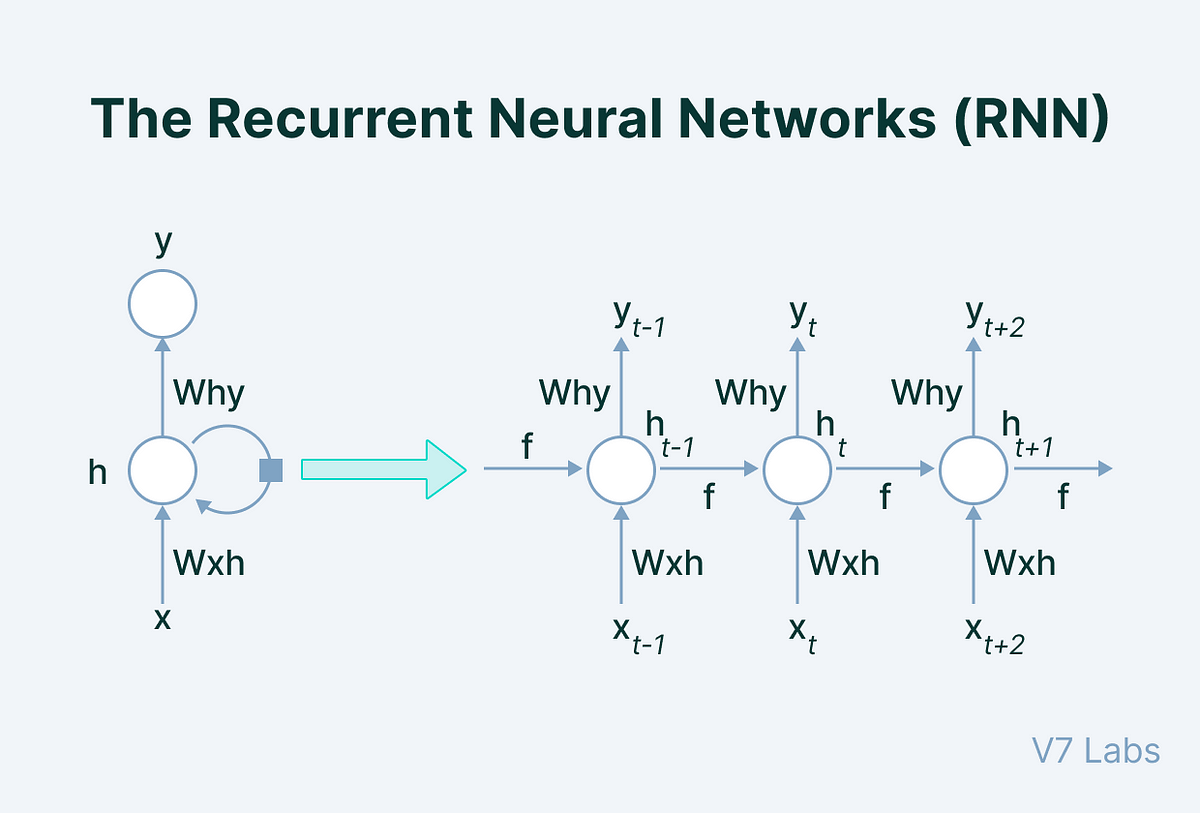

### 1. C√°lculo del estado oculto: 

El estado oculto $‚Ñé_{ùë°}$ en el tiempo $ùë°$ se actualiza usando la siguiente ecuaci√≥n:

$$h_t = \sigma(W_{hh} h_{t-1} + W_{xh} x_t + b_h)$$


Donde:

‚Äã$h_t$:  es el estado oculto en el tiempo ùë°.

$W_{hh}$: son los pesos recurrentes que conectan el estado anterior $‚Ñé_{ùë°-1}$ al nuevo estado.

‚Äã
$W_{xh}$:  son los pesos que conectan la entrada $ùë•_ùë°$ al estado oculto.

$b_h$: es el sesgo (bias).

$\sigma$: es la funci√≥n de activaci√≥n, que introduce no linealidad y controla los valores del estado oculto.

### 2. Salida de la red:

Despu√©s de calcular el estado oculto $‚Ñé_ùë°$‚Äã, la RNN genera una salida $ùë¶_ùë°$‚Äã, que es una transformaci√≥n lineal del estado oculto:

$$y_t = W_{hy} h_t + b_y$$


Donde:

$ùë¶_ùë°$: es la salida en el tiempo $ùë°$.
‚Äã

$W_{hy}$:  son los pesos que conectan el estado oculto con la salida.

$ùëè_ùë¶$:  es el sesgo aplicado a la salida.

## Ejemplo

In [31]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from torch.nn.utils.rnn import pad_sequence

import matplotlib.pyplot as plt

In [2]:
# Corpus extendido de entrenamiento (20 frases)
corpus_entrenamiento = [
    "el perro corre r√°pido",
    "el gato duerme en la cama",
    "el perro y el gato juegan juntos",
    "el gato maulla cuando tiene hambre",
    "el perro ladra en la noche",
    "el sol brilla en el cielo",
    "la luna ilumina la noche",
    "las estrellas brillan en el cielo",
    "el caballo galopa por el campo",
    "el gato corre por la casa",
    "el perro salta sobre la cama",
    "el conejo salta en el jard√≠n",
    "el rat√≥n corre detr√°s del gato",
    "el elefante es muy grande",
    "el le√≥n es el rey de la selva",
    "el tigre caza en la selva",
    "el lobo a√∫lla en la noche",
    "la vaca da leche en la granja",
    "el gallo canta al amanecer",
    "el pato nada en el lago"
]

# Corpus de validaci√≥n (5 frases)
corpus_validacion = [
    "el gato juega en el jard√≠n",
    "el perro duerme en la casa",
    "el conejo come zanahorias",
    "el le√≥n ruge en la selva",
    "el rat√≥n se esconde en la madriguera"
]


In [3]:
# Tokenizaci√≥n y creaci√≥n del vocabulario
vocabulario = list(set(" ".join(corpus_entrenamiento + corpus_validacion).split()))
vocab_size = len(vocabulario)
word_to_idx = {word: i for i, word in enumerate(vocabulario)}
idx_to_word = {i: word for i, word in enumerate(vocabulario)}

print(f"Vocabulario: {vocabulario}")
print(f"√çndices de palabras: {word_to_idx}")

Vocabulario: ['lobo', 'elefante', 'juegan', 'selva', 'ilumina', 'ruge', 'detr√°s', 'canta', 'campo', 'sol', 'estrellas', 'r√°pido', 'galopa', 'duerme', 'hambre', 'zanahorias', 'rat√≥n', 'vaca', 'lago', 'del', 'las', 'cama', 'sobre', 'come', 'nada', 'leche', 'la', 'de', 'maulla', 'cuando', 'corre', 'tiene', 'por', 'grande', 'da', 'cielo', 'juega', 'es', 'noche', 'brillan', 'muy', 'salta', 'granja', 'amanecer', 'le√≥n', 'caballo', 'pato', 'rey', 'a√∫lla', 'gato', 'ladra', 'y', 'conejo', 'jard√≠n', 'perro', 'se', 'el', 'luna', 'en', 'tigre', 'al', 'caza', 'esconde', 'casa', 'madriguera', 'gallo', 'juntos', 'brilla']
√çndices de palabras: {'lobo': 0, 'elefante': 1, 'juegan': 2, 'selva': 3, 'ilumina': 4, 'ruge': 5, 'detr√°s': 6, 'canta': 7, 'campo': 8, 'sol': 9, 'estrellas': 10, 'r√°pido': 11, 'galopa': 12, 'duerme': 13, 'hambre': 14, 'zanahorias': 15, 'rat√≥n': 16, 'vaca': 17, 'lago': 18, 'del': 19, 'las': 20, 'cama': 21, 'sobre': 22, 'come': 23, 'nada': 24, 'leche': 25, 'la': 26, 'de': 27

In [4]:
# Dataset personalizado
class TextDataset(Dataset):
    def __init__(self, corpus, word_to_idx):
        self.data = [[word_to_idx[word] for word in oracion.split()] for oracion in corpus]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seq = self.data[idx]
        input_seq = torch.LongTensor(seq[:-1])  # Todas menos la √∫ltima palabra
        target_seq = torch.LongTensor(seq[1:])  # Todas menos la primera palabra (predicci√≥n de la siguiente palabra)
        return input_seq, target_seq

In [5]:
# Crear los datasets de entrenamiento y validaci√≥n
dataset_entrenamiento = TextDataset(corpus_entrenamiento, word_to_idx)
dataset_validacion = TextDataset(corpus_validacion, word_to_idx)

In [9]:
dataset_entrenamiento.data[:4]

[[56, 54, 30, 11],
 [56, 49, 13, 58, 26, 21],
 [56, 54, 51, 56, 49, 2, 66],
 [56, 49, 28, 29, 31, 14]]

In [12]:
dataset_entrenamiento.__getitem__(0)

(tensor([56, 54, 30]), tensor([54, 30, 11]))

In [ ]:
batch_size = 4
dataloader_validacion = DataLoader(dataset_validacion, batch_size=batch_size, shuffle=False)

In [ ]:
for i, o in dataloader_validacion:
    print(i)

RuntimeError: stack expects each tensor to be equal size, but got [5] at entry 0 and [3] at entry 2

In [ ]:
dataset_validacion.__getitem__(0), dataset_validacion.__getitem__(2) 

((tensor([56, 49, 36, 58, 56]), tensor([49, 36, 58, 56, 53])),
 (tensor([56, 52, 23]), tensor([52, 23, 15])))

El problema original era causado por las secuencias de diferentes longitudes que se estaban intentando apilar en un solo tensor. Para solucionarlo, hemos implementado padding usando la funci√≥n pad_sequence de PyTorch, y hemos creado una funci√≥n de colaci√≥n personalizada que se asegura de que todas las secuencias en un lote tengan el mismo tama√±o antes de ser procesadas por el modelo.

Ahora deber√≠as poder entrenar el modelo sin errores relacionados con las diferentes longitudes de las secuencias.

In [51]:
# Funci√≥n personalizada de colaci√≥n que rellena las secuencias
def collate_fn(batch):
    inputs = [item[0] for item in batch]  # Secuencias de entrada
    targets = [item[1] for item in batch]  # Secuencias objetivo (targets)
    
    # Rellenar secuencias con ceros para que todas tengan la misma longitud
    inputs_padded = pad_sequence(inputs, batch_first=True, padding_value=0)
    targets_padded = pad_sequence(targets, batch_first=True, padding_value=0)
    
    return inputs_padded, targets_padded

In [52]:
# Crear DataLoader para ambos conjuntos de datos
batch_size = 4
dataloader_entrenamiento = DataLoader(dataset_entrenamiento, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
dataloader_validacion = DataLoader(dataset_validacion, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [54]:
j=0
for i, o in dataloader_validacion:
    print('Estos son los inputs', i)
    j += 1
    if j == 1:
        break

Estos son los inputs tensor([[56, 49, 36, 58, 56],
        [56, 54, 13, 58, 26],
        [56, 52, 23,  0,  0],
        [56, 44,  5, 58, 26]])


In [55]:
# Definir el modelo RNN
class ModeloRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(ModeloRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        rnn_out, _ = self.rnn(embedded)
        output = self.fc(rnn_out)
        return output


In [56]:
# Definir los par√°metros del modelo
embedding_dim = 10
hidden_dim = 50
output_dim = vocab_size

modelo_rnn = ModeloRNN(vocab_size, embedding_dim, hidden_dim, output_dim)

In [57]:
# Definir el optimizador y la funci√≥n de p√©rdida
optimizer = optim.Adam(modelo_rnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [58]:
# Funci√≥n para entrenar el modelo
def entrenar_modelo(modelo, dataloader, optimizer, criterion, num_epochs=50):
    modelo.train()  # Modo de entrenamiento
    for epoch in range(num_epochs):
        total_loss = 0
        for inputs, targets in dataloader:
            optimizer.zero_grad()

            # Forward pass
            outputs = modelo(inputs)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))

            # Backward pass y optimizaci√≥n
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1}/{num_epochs}, P√©rdida total: {total_loss:.4f}")


In [60]:
# Entrenar el modelo
entrenar_modelo(modelo_rnn, dataloader_entrenamiento, optimizer, criterion, num_epochs=50)

Epoch: 10/50, P√©rdida total: 2.2436
Epoch: 20/50, P√©rdida total: 2.2976
Epoch: 30/50, P√©rdida total: 2.2756
Epoch: 40/50, P√©rdida total: 2.3107
Epoch: 50/50, P√©rdida total: 2.3329


In [61]:
# Funci√≥n para validar el modelo
def validar_modelo(modelo, dataloader, criterion):
    modelo.eval()  # Poner el modelo en modo de evaluaci√≥n
    total_loss = 0
    with torch.no_grad():  # Desactivar el c√°lculo del gradiente
        for inputs, targets in dataloader:
            outputs = modelo(inputs)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
            total_loss += loss.item()
    
    avg_loss = total_loss / len(dataloader)  # Promediar el loss
    return avg_loss

In [62]:
# Funci√≥n para entrenar el modelo y graficar el loss de entrenamiento y validaci√≥n
def entrenar_modelo_con_validacion(modelo, dataloader_entrenamiento, dataloader_validacion, optimizer, criterion, num_epochs=50):
    modelo.train()  # Modo de entrenamiento
    train_losses = []  # Lista para almacenar el loss de cada epoch (entrenamiento)
    valid_losses = []  # Lista para almacenar el loss de cada epoch (validaci√≥n)
    
    for epoch in range(num_epochs):
        modelo.train()  # Asegurarse de estar en modo de entrenamiento
        total_train_loss = 0
        for inputs, targets in dataloader_entrenamiento:
            optimizer.zero_grad()

            # Forward pass
            outputs = modelo(inputs)
            loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))

            # Backward pass y optimizaci√≥n
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        # Almacenar el loss promedio de la √©poca
        avg_train_loss = total_train_loss / len(dataloader_entrenamiento)
        train_losses.append(avg_train_loss)

        # Validar el modelo en el conjunto de validaci√≥n
        avg_valid_loss = validar_modelo(modelo, dataloader_validacion, criterion)
        valid_losses.append(avg_valid_loss)

        # Imprimir el loss de entrenamiento y validaci√≥n cada 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1}/{num_epochs}, P√©rdida de Entrenamiento: {avg_train_loss:.4f}, P√©rdida de Validaci√≥n: {avg_valid_loss:.4f}")
    
    # Graficar la evoluci√≥n del loss durante el entrenamiento y la validaci√≥n
    plt.plot(range(1, num_epochs + 1), train_losses, label='Loss Entrenamiento')
    plt.plot(range(1, num_epochs + 1), valid_losses, label='Loss Validaci√≥n')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Evoluci√≥n del Loss en Entrenamiento y Validaci√≥n')
    plt.legend()
    plt.show()


Epoch: 10/50, P√©rdida de Entrenamiento: 0.4438, P√©rdida de Validaci√≥n: 7.4045
Epoch: 20/50, P√©rdida de Entrenamiento: 0.4667, P√©rdida de Validaci√≥n: 7.4134
Epoch: 30/50, P√©rdida de Entrenamiento: 0.4669, P√©rdida de Validaci√≥n: 7.4330
Epoch: 40/50, P√©rdida de Entrenamiento: 0.4434, P√©rdida de Validaci√≥n: 7.4472
Epoch: 50/50, P√©rdida de Entrenamiento: 0.4492, P√©rdida de Validaci√≥n: 7.4480


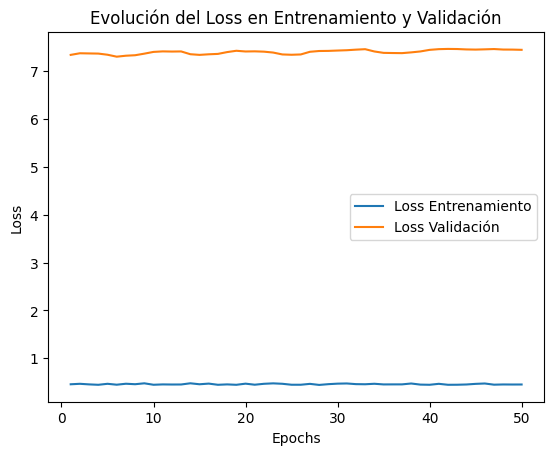

In [63]:
# Entrenar y validar el modelo
entrenar_modelo_con_validacion(modelo_rnn, dataloader_entrenamiento, dataloader_validacion, optimizer, criterion, num_epochs=50)

In [64]:
# Funci√≥n para predecir la siguiente palabra
def predecir_siguiente_palabra(modelo, secuencia_inicial, word_to_idx, idx_to_word, max_len=5):
    modelo.eval()  # Poner el modelo en modo de evaluaci√≥n
    words = secuencia_inicial.split()  # Tokenizar la oraci√≥n inicial
    indices_iniciales = [word_to_idx[word] for word in words if word in word_to_idx]  # Convertir palabras a √≠ndices

    if len(indices_iniciales) == 0:
        print("La secuencia inicial no contiene palabras en el vocabulario.")
        return None

    input_seq = torch.LongTensor(indices_iniciales).unsqueeze(0)  # Crear tensor de la secuencia inicial

    with torch.no_grad():
        # Pasar la secuencia por la RNN para obtener la predicci√≥n de la siguiente palabra
        salida = modelo(input_seq)
        pred_idx = salida[:, -1, :].argmax(dim=1).item()  # Tomar la palabra m√°s probable (√∫ltima salida)

    # Convertir el √≠ndice predicho en palabra
    palabra_predicha = idx_to_word[pred_idx]
    return palabra_predicha

In [69]:
# Probar la predicci√≥n con una oraci√≥n inicial
secuencia_inicial = "el gato"
secuencia_inicial = "en la cama"
secuencia_inicial = "estrella galopa duerme"
palabra_predicha = predecir_siguiente_palabra(modelo_rnn, secuencia_inicial, word_to_idx, idx_to_word)
print(f"Predicci√≥n para la secuencia '{secuencia_inicial}': {palabra_predicha}")

Predicci√≥n para la secuencia 'estrella galopa duerme': canta
